In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [13]:
dfx =pd.read_csv("../data/xdata.csv",index_col=0,names=["X","Y"])
dfy = pd.read_csv("../data/ydata.csv",index_col=0,names=["class"])

In [15]:
x = dfx.values
y = dfy.values

In [17]:
x.shape

(400, 2)

In [20]:
y = y.reshape(-1)

In [23]:
y.shape

(400,)

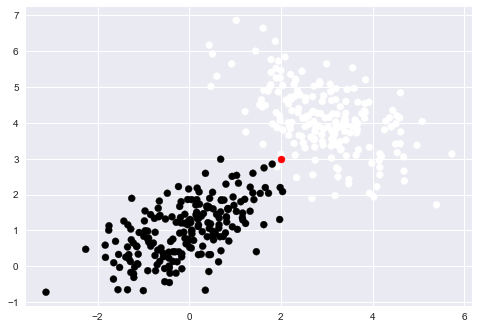

In [32]:
query_x = np.array([2,3])
plt.scatter(x[:,0],x[:,1],c=y)
plt.scatter(query_x[0],query_x[1],color="red")
plt.show()

In [102]:
def dis(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,queryPoint,k=5):
    vals = []
    m = X.shape[0]
    for i in range(m):
        d =dis(queryPoint,X[i]);
        vals.append((d,Y[i]))
    vals = sorted(vals)
    vals = vals[:k]
    vals = np.array(vals)
    vals = vals[:,1]
    new_vals = np.unique(vals,return_counts=True) 
#     print(vals)
    max_freq_index = new_vals[1].argmax()
    return new_vals[0][max_freq_index]
#     print(vals)
    
    

In [62]:
knn(x,y,[1.4,3])

[1. 1. 1. 0. 0.]


1.0

## Recognising hand written digits on MNIST Dataset using KNN

In [67]:
df = pd.read_csv("../data/mnist/mnist_train.csv")
print(df.shape)

(42000, 785)


In [70]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
y_train = df["label"].values

In [76]:
x_train = df.values[:,1:]

In [87]:
split = int(.8*x_train.shape[0])
split

33600

In [89]:
x_test = x_train[split:,:]
y_test = y_train[split:]
x_train = x_train[:split,:]
y_train = y_train[:split]

In [91]:
print(x_test.shape,y_test.shape,x_train.shape,y_train.shape)

(8400, 784) (8400,) (33600, 784) (33600,)


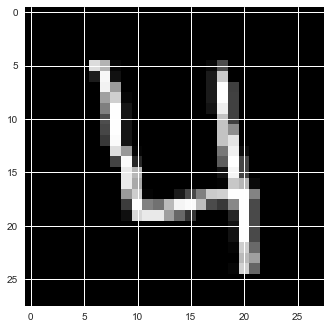

In [95]:
def drawImf(sample):
    img = sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()
drawImf(x_train[3])    

# Make Predicition 

In [100]:
pred = knn(x_train,y_train,x_test[1])

[7. 7. 7. 7. 7.]


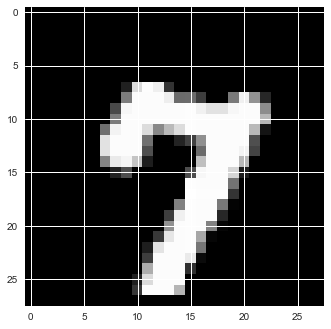

In [101]:
drawImf(x_test[1])

In [104]:
def accuracy(x_train,x_test,y_train,y_test):
    total = y_test.shape[0]
    correct = 0
    for i in range(total):
        pred = knn(x_train,y_train,x_test[i])
        if pred == y_test[i]:correct= correct+1
    return (correct/total)*100        

In [106]:
acc = accuracy(x_train,x_test[:5],y_train,y_test[:5])

In [107]:
print(acc)

100.0
